In [42]:
import os
import numpy as np
import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
datadir = '/Data/sim/antonk/shom5km_defor_4cnn'

In [29]:
lfiles=list(map(os.path.basename,glob.glob(os.path.join(datadir,'field*.npz'))))
n = len(lfiles)
print(f'{n} files found')

529 files found


In [30]:
#Load the first file to set the dimensions
sample0 = np.load(os.path.join(datadir,lfiles[0]))
dam0 = d['d']
ny, nx = dam0.shape


In [60]:
# Create dataset
colnames = ('deformation_0',)
othernames = ('h',)
nc = len(colnames) #number of channel
no = len(othernames) #other data used for masking, diag but not in input
Xall = np.empty((n,ny,nx,nc+no))
target = np.empty((n,ny,nx,1))
for i in tqdm(range(n)):
    sample = np.load(os.path.join(datadir,lfiles[i]))
    target[i,:,:,0] = sample['d']
    for ic,c in enumerate(colnames+othernames):
        if c == 'deformation_0':
            xx = np.hypot(sample['e1_0'], sample['e2_0'])
        else:
            xx = sample[c]
        Xall[i,:,:,ic] = xx
            
X = Xall[...,:nc]
Xother = Xall[...,nc:]

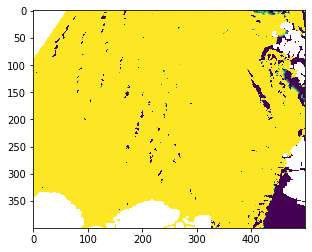

In [62]:
# Mask sea ice 
plt.imshow(Xother[10],vmin=0.9,vmax=1)

In [33]:
d = dict()
for k in sample0.files:
    d[k] = sample0[k]

In [22]:
d.keys()

dict_keys(['u', 'v', 'e1_0', 'e2_0', 'e1_1', 'e2_1', 'd', 'c', 'h'])

In [24]:
d['h'].shape

(400, 500)

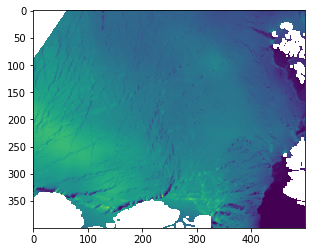

In [34]:
plt.imshow(d['h'])